In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme('paper')


import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
# plt.rcParams['text.usetex'] = True

from scipy.signal import find_peaks

import os
path='./figs/'
os.makedirs(path,exist_ok=True)

# 示波器波形

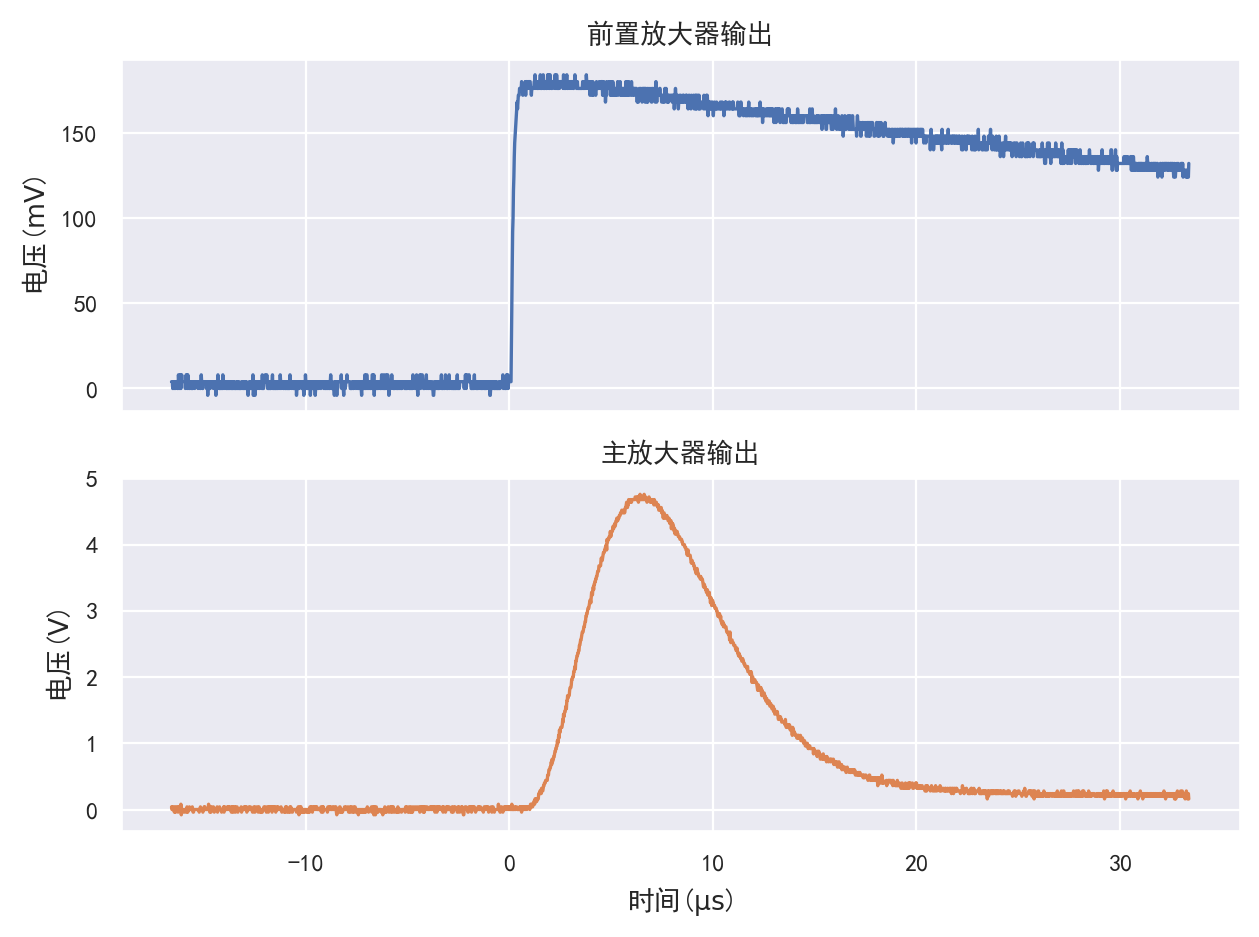

In [2]:
CH1 = pd.read_csv('./data/TEK0000.CSV',header=None)
CH2 = pd.read_csv('./data/TEK0001.CSV',header=None)
oscilloscope = pd.DataFrame({'T_data':CH1[3]*1e6,
                             'CH1_data':CH1[4]*1e3,
                             'CH2_data':CH2[4]})
axes = oscilloscope.plot(x = 'T_data',subplots = True,legend=False)
fig = axes[0].get_figure()
axes[-1].set_xlabel(r'时间(${\rm \mu s}$)')
axes[0].set_ylabel(r'电压(${\rm mV}$)')
axes[0].set_title('前置放大器输出')
axes[1].set_ylabel(r'电压(${\rm V}$)')
axes[1].set_title('主放大器输出')
fig.tight_layout()
fig.savefig(path + 'oscilloscope.pdf')

In [3]:
datapath ='./data/zxtql/'
files = os.listdir(datapath)

txtfiles = []
for file in files:
    _,extension= os.path.splitext(file)
    if extension=='.txt':
        txtfiles.append(file)

txtfiles.sort(key = lambda x:eval(os.path.splitext(x)[0]))
txtfiles

['5.txt',
 '10.txt',
 '20.txt',
 '30.txt',
 '60.txt',
 '80.txt',
 '100.txt',
 '120.txt']

# 获得最佳分辨率

In [4]:
data_dict = {eval(os.path.splitext(txtfile)[0]):pd.read_csv(datapath+txtfile, sep='\t')['1'].values \
             for txtfile in txtfiles}
data1 = pd.DataFrame(data_dict)
data1

,5,10,20,30,60,80,100,120
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,0,0
1022,0,0,0,0,0,0,0,0


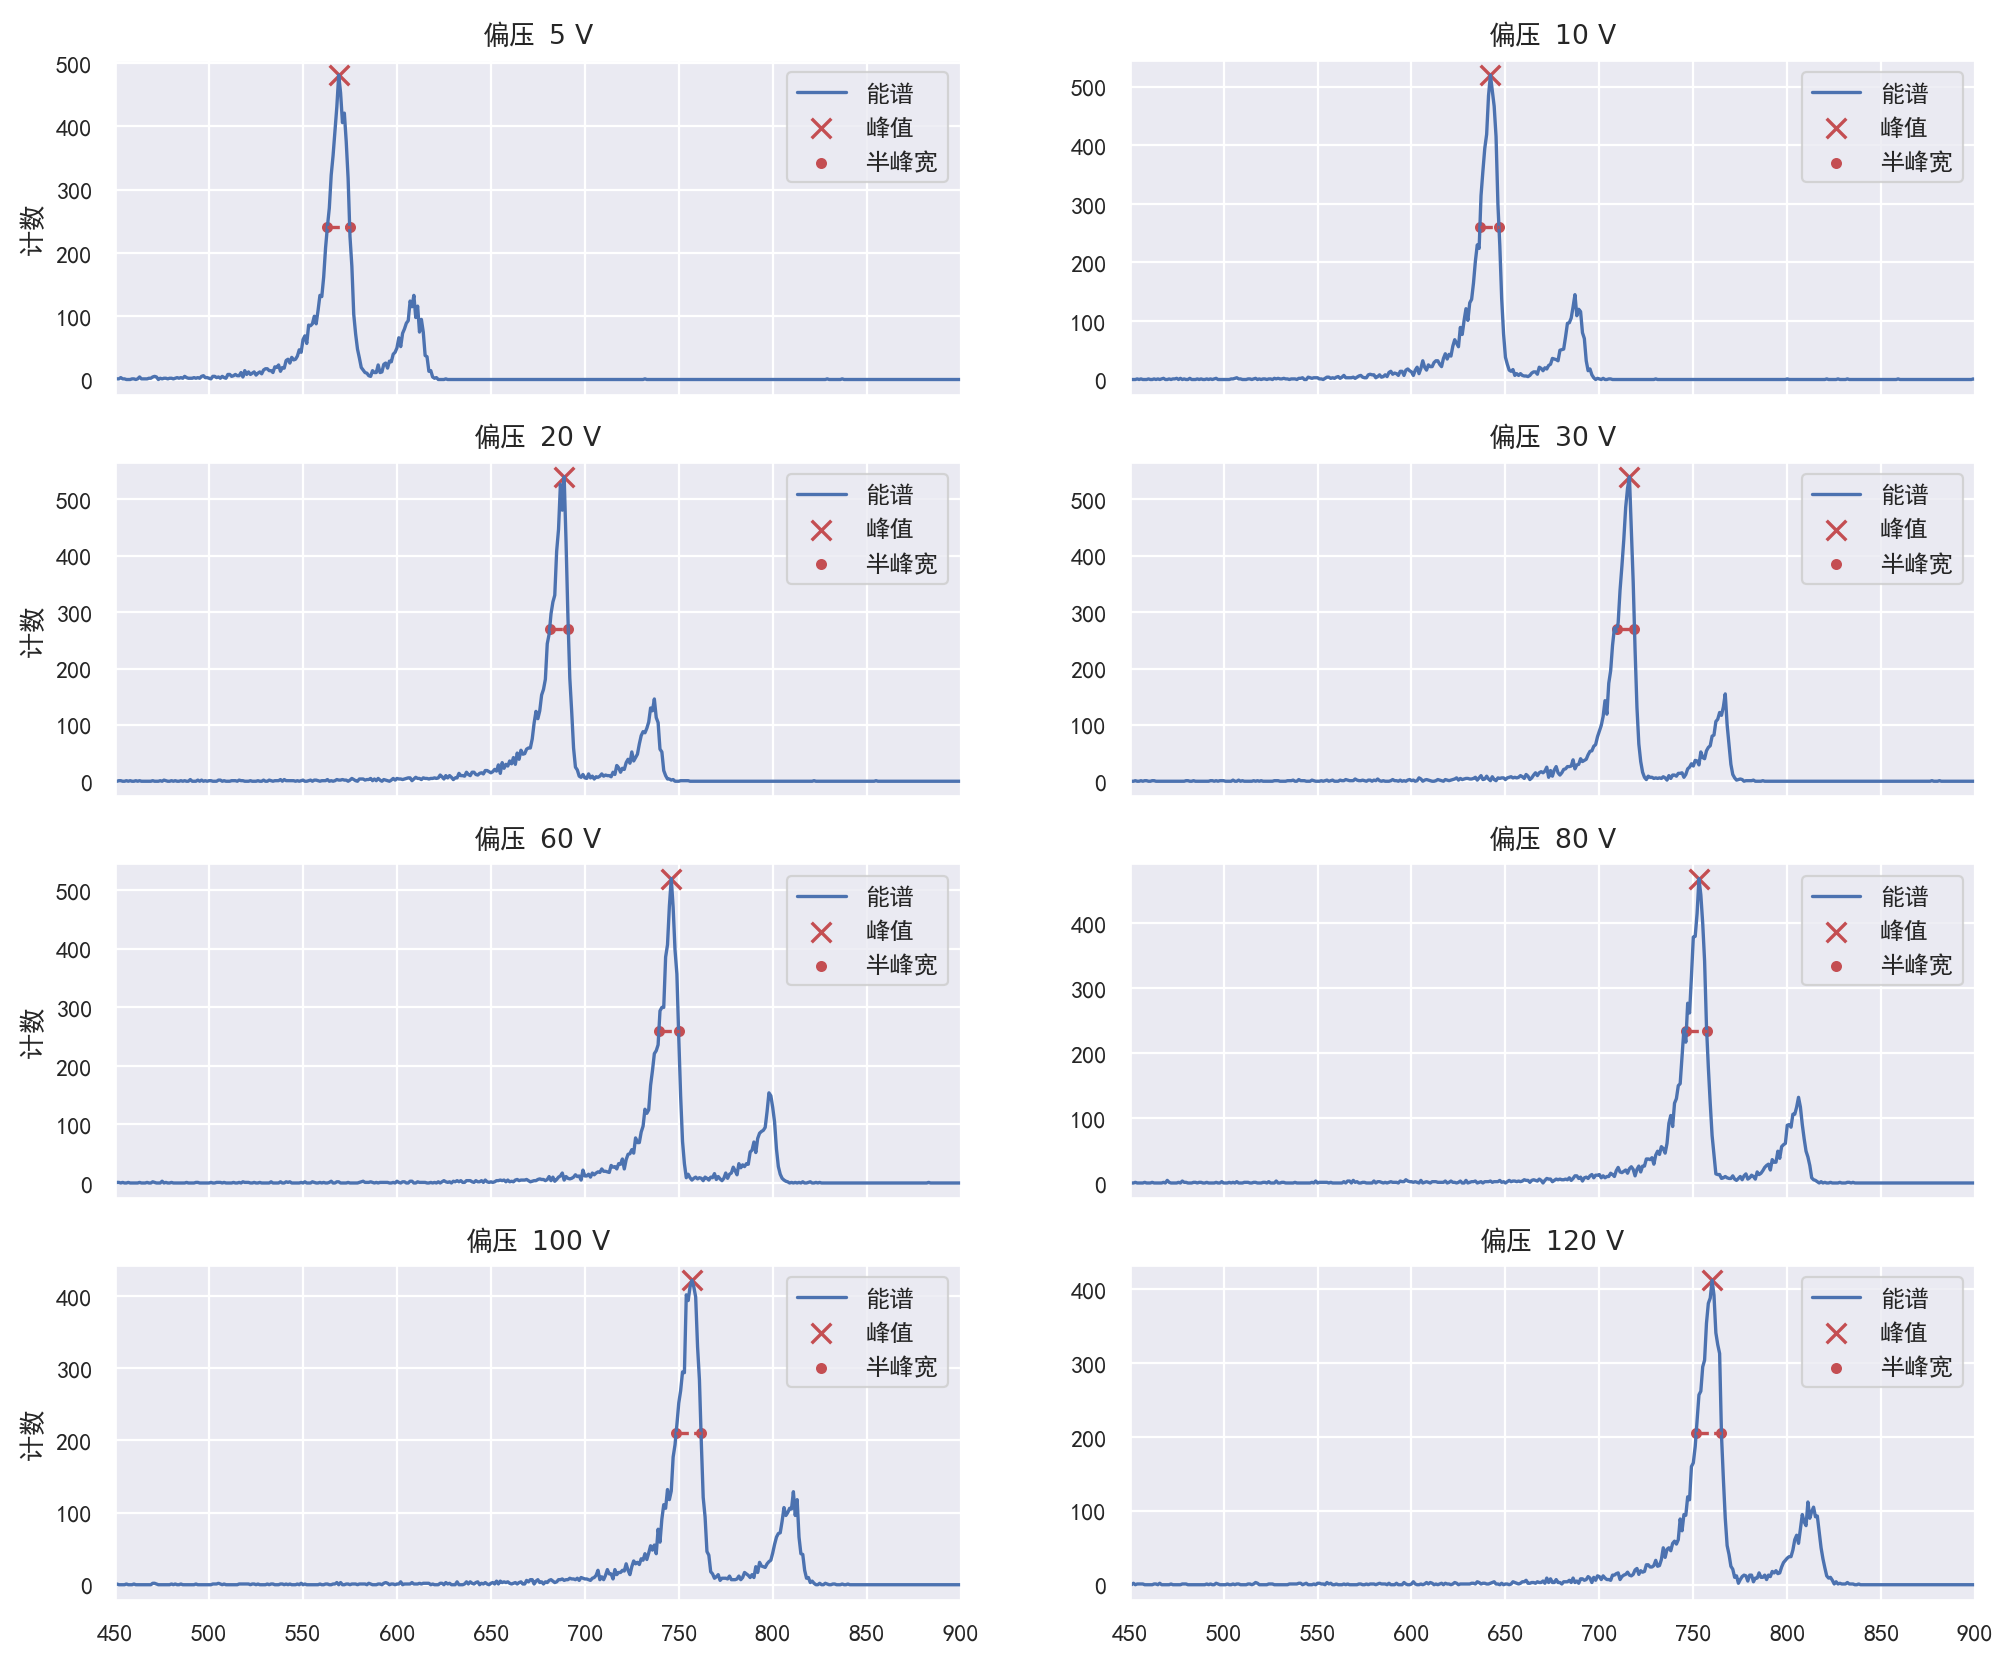

In [5]:
axes = data1.plot(subplots=True,layout=(4,2),figsize=(12,10),color = 'b')
axes = axes.flatten()
axes[0].set_xlim([450,900])

peaks = []
widths = []
for i,(col,ax) in enumerate(zip(data1,axes)):
    # peak analysis
    peak,info = find_peaks(data1[col],
                           prominence = 400,
                           width = 8)
    peak = peak[0]
    peaks.append(peak)
    widths.append(info['widths'][0])

    # ploting
    ax.scatter(peak,data1[col][peak],marker='x',s=50,color='r',label='peak')
    ax.scatter(info['left_ips'][0],info['width_heights'][0],s=10,color='r')
    ax.scatter(info['right_ips'][0],info['width_heights'][0],s=10,color='r')
    ax.hlines(info['width_heights'][0],info['left_ips'][0],info['right_ips'][0],
              linestyles = 'dashed',color='r',label = 'FWHM')
    ax.legend(['能谱','峰值','半峰宽'])
    ax.set_title(fr'偏压 ${col}~{{\rm V}}$')
    if i%2 == 0:
        ax.set_ylabel('计数')
fig.tight_layout()
fig.savefig(path+'best_volt.pdf')

In [6]:
result1 = pd.DataFrame({'Volt':data1.columns.values,
                        'peak':peaks,
                        'width':widths})

result1['resolution'] = result1['width']/result1['peak']
result1

,Volt,peak,width,resolution
0,5,569,11.886509,0.020890
1,10,642,10.157143,0.015821
2,20,689,9.951835,0.014444
3,30,716,9.425000,0.013163
4,60,746,10.476115,0.014043
5,80,753,10.825521,0.014377
6,100,757,13.231938,0.017479
7,120,760,13.421107,0.017659
